In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("D:\ml\heart.csv")
df

Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0     75  Female          228             119          66  Current   
1     48    Male          204             165          62  Current   
2     53    Male          234              91          67    Never   
3     69  Female          192              90          72  Current   
4     62  Female          172             163          93    Never   
..   ...     ...          ...             ...         ...      ...   
995   56  Female          269             111          86    Never   
996   78  Female          334             145          76    Never   
997   79    Male          151             179          81    Never   
998   60  Female          326             151          68   Former   
999   53    Male          226             116          82  Current   

    Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0            Heavy               1             No       No     Yes   
1             None               5             No       No      No   
2            Heavy               3            Yes       No     Yes   
3             None               4             No      Yes      No   
4             None               6             No      Yes      No   
..             ...             ...            ...      ...     ...   
995          Heavy               5             No      Yes     Yes   
996           None               6             No       No      No   
997       Moderate               4            Yes       No     Yes   
998           None               8            Yes      Yes      No   
999           None               6             No       No     Yes   

     Stress Level  Blood Sugar Exercise Induced Angina   Chest Pain Type  \
0               8          119                     Yes   Atypical Angina   
1               9           70                     Yes    Typical Angina   
2               5          196                     Yes   Atypical Angina   
3               7          107                     Yes  Non-anginal Pain   
4               2          183                     Yes      Asymptomatic   
..            ...          ...                     ...               ...   
995            10          120                      No  Non-anginal Pain   
996            10          196                     Yes    Typical Angina   
997             8          189                     Yes      Asymptomatic   
998             5          174                     Yes   Atypical Angina   
999             5          161                     Yes      Asymptomatic   

     Heart Disease  
0                1  
1                0  
2                1  
3                0  
4                0  
..             ...  
995              1  
996              1  
997              0  
998              1  
999              1  

[1000 rows x 16 columns]

In [3]:
df.isnull().sum()

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


categorical_columns = ["Gender", "Smoking", "Alcohol Intake", "Family History", "Diabetes",
                       "Obesity", "Exercise Induced Angina", "Chest Pain Type"]

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [5]:

X = df.drop(columns=["Heart Disease"])
y = df["Heart Disease"]



In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [8]:

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  


In [9]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9966666666666667

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       171
           1       1.00      0.99      1.00       129

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [11]:
results_df = X_test.copy()
results_df["Heart Disease Prediction"] = y_pred
results_df["Risk Probability"] = y_prob
results_df.head(10)


Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
521   77       0          248              96          72        0   
737   42       1          293             143          80        2   
740   42       0          206             127          97        0   
660   40       0          288             101          84        2   
411   78       0          213             119          99        0   
678   40       0          188             117          62        1   
626   49       0          214             130          60        1   
513   43       1          285             154          80        2   
859   62       1          229             155          97        1   
136   64       1          195             105          76        0   

     Alcohol Intake  Exercise Hours  Family History  Diabetes  Obesity  \
521               1               2               0         1        1   
737               2               6               1         0        1   
740               2               2               1         1        1   
660               0               9               1         1        0   
411               0               2               0         0        1   
678               0               3               0         1        1   
626               2               7               0         1        1   
513               2               6               0         1        1   
859               0               5               0         0        0   
136               2               7               1         1        1   

     Stress Level  Blood Sugar  Exercise Induced Angina  Chest Pain Type  \
521             9           97                        0                0   
737            10          127                        0                2   
740             4          163                        0                3   
660             7          153                        1                2   
411             3          177                        0                2   
678             9          188                        0                0   
626             3           87                        0                2   
513             5          115                        1                2   
859             5          101                        1                3   
136             5          142                        1                3   

     Heart Disease Prediction  Risk Probability  
521                         1              0.91  
737                         0              0.05  
740                         0              0.09  
660                         0              0.02  
411                         1              0.82  
678                         0              0.04  
626                         0              0.08  
513                         0              0.05  
859                         1              0.86  
136                         0              0.24

In [12]:
import pandas as pd

results_df = X_test.copy()
results_df["Heart Disease Prediction"] = y_pred
results_df["Risk Probability"] = y_prob

print(results_df.head(10))


     Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
521   77       0          248              96          72        0   
737   42       1          293             143          80        2   
740   42       0          206             127          97        0   
660   40       0          288             101          84        2   
411   78       0          213             119          99        0   
678   40       0          188             117          62        1   
626   49       0          214             130          60        1   
513   43       1          285             154          80        2   
859   62       1          229             155          97        1   
136   64       1          195             105          76        0   

     Alcohol Intake  Exercise Hours  Family History  Diabetes  Obesity  \
521               1               2               0         1        1   
737               2               6               1         0        1   
740    

In [13]:
import pandas as pd

results_df = X_test.copy()
results_df["Heart Disease Prediction"] = y_pred
results_df["Risk Probability"] = y_prob  

# Filter patients who are predicted to NOT have heart disease (0)
no_disease_df = results_df[results_df["Heart Disease Prediction"] == 0].copy()

no_disease_df = no_disease_df[["Risk Probability"]].rename(columns={"Risk Probability": "Chances of Developing Heart Disease"})
no_disease_df["Chances of Developing Heart Disease"] = no_disease_df["Chances of Developing Heart Disease"] * 100 

print(no_disease_df.head(10))  


     Chances of Developing Heart Disease
737                                  5.0
740                                  9.0
660                                  2.0
678                                  4.0
626                                  8.0
513                                  5.0
136                                 24.0
636                                 23.0
938                                  9.0
899                                 20.0


In [14]:

! pip install pickle-mixin



In [20]:
import pickle

# Save Random Forest Model for Heart Disease
with open("heart_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)


In [16]:
!pip install seaborn


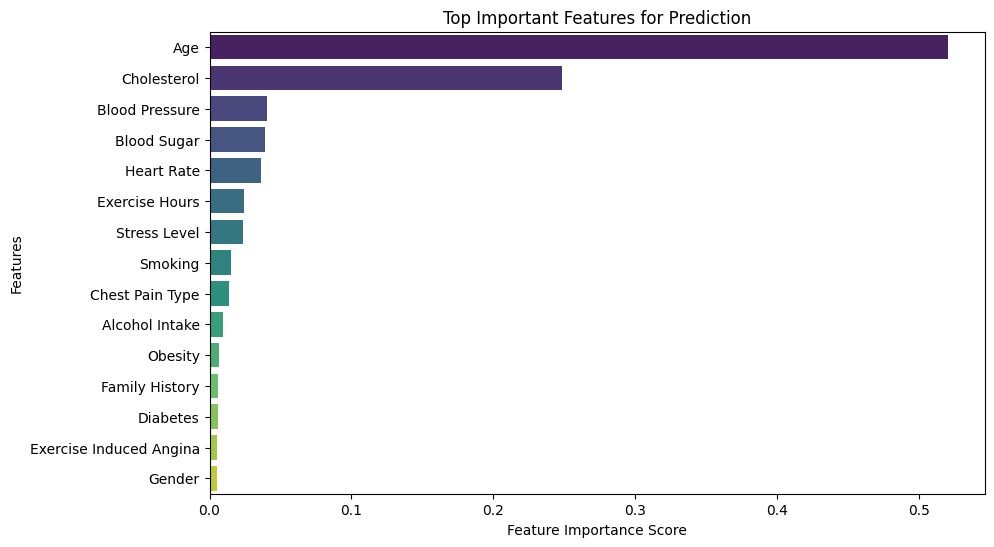

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming rf_model is trained and feature_names are available
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns  # Replace with actual feature names

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})

# Sort features by importance
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top Important Features for Prediction")
plt.show()


In [21]:
import pickle

# Assuming rf_model, diabetes_model, lung_model are your trained models
with open("D:/ml/final_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

